In [0]:
# Vajalike moodulite importimine

# Numpy
import numpy as np

# Pandas
import pandas as pd

# Visualiseerimine
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# GD-ga ühendamine
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Andmede sisselugemine
vle = pd.read_csv('drive/My Drive/Colab Notebooks/vle.csv')

In [4]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [5]:
assessments = pd.read_csv('drive/My Drive/Colab Notebooks/assessments.csv')
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [6]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
code_module          206 non-null object
code_presentation    206 non-null object
id_assessment        206 non-null int64
assessment_type      206 non-null object
date                 195 non-null float64
weight               206 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [0]:
student_vle = pd.read_csv('drive/My Drive/Colab Notebooks/studentVle.csv')

In [8]:
student_vle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


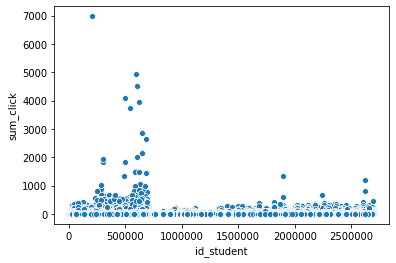

In [9]:
sns.scatterplot(student_vle.id_student, student_vle.sum_click)

In [10]:
total_vle = pd.merge(student_vle, vle)
total_vle

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to
0,AAA,2013J,28400,546652,-10,4,forumng,NaN,NaN
1,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
2,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
3,AAA,2013J,28400,546652,-10,8,forumng,NaN,NaN
4,AAA,2013J,30268,546652,-10,3,forumng,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,647054,896969,227,8,oucontent,NaN,NaN
10655276,GGG,2014J,499187,896969,228,8,oucontent,NaN,NaN
10655277,GGG,2014J,629258,896969,228,23,oucontent,NaN,NaN
10655278,GGG,2014J,534672,896969,228,1,oucontent,NaN,NaN


In [11]:
total_vle_by_student = total_vle.groupby(['code_module', 'code_presentation', 'id_student', 'id_site', 'activity_type'], as_index=False).agg({'sum_click': 'sum'})
total_vle_by_student

,code_module,code_presentation,id_student,id_site,activity_type,sum_click
0,AAA,2013J,11391,546614,homepage,138
1,AAA,2013J,11391,546644,forumng,35
2,AAA,2013J,11391,546645,forumng,15
3,AAA,2013J,11391,546647,forumng,9
4,AAA,2013J,11391,546650,forumng,10
...,...,...,...,...,...,...
1960491,GGG,2014J,2684003,897076,resource,1
1960492,GGG,2014J,2684003,897121,resource,1
1960493,GGG,2014J,2684003,897150,subpage,9
1960494,GGG,2014J,2684003,897151,subpage,17


In [12]:
total_vle_by_module = total_vle.groupby(['code_module', 'code_presentation', 'id_site', 'activity_type']).agg({'sum_click': 'sum'})
pd.set_option('display.max_rows', 10)
total_vle_by_module

sum_click
code_module code_presentation id_site activity_type           
AAA         2013J             546614  homepage          140345
                              546644  forumng            22228
                              546645  forumng             7621
                              546647  forumng             3844
                              546648  forumng             1959
...                                                        ...
GGG         2014J             897150  subpage             4926
                              897151  subpage            11575
                              897152  subpage              695
                              897153  subpage              165
                              897154  subpage              127

[6268 rows x 1 columns]

In [13]:
total_vle_by_module_and_activity_type = total_vle.groupby(['code_module', 'code_presentation', 'activity_type']).agg({'sum_click': 'sum'})
pd.set_option('display.max_rows', 7000)
total_vle_by_module_and_activity_type

sum_click
code_module code_presentation activity_type            
AAA         2013J             dataplus             1843
                              forumng            175513
                              glossary              327
                              homepage           140345
                              oucollaborate         241
                              oucontent          267482
                              resource             7365
                              subpage             39624
                              url                 15754
            2014J             dataplus             1555
                              forumng            161590
                              glossary              329
                              homepage           126375
                              oucollaborate         257
                              oucontent          255912
                              resource             7559
                              subpage             31958
                              url                 12623
BBB         2013B             forumng            811107
                              glossary             1906
                              homepage           291961
                              oucontent            1375
                              ouelluminate         1433
                              quiz                93805
                              resource            46552
                              sharedsubpage          59
                              subpage             79867
                              url                 19846
            2013J             forumng            702326
                              glossary             1916
                              homepage           344964
                              oucollaborate        1144
                              oucontent           34877
                              quiz               118688
                              resource            54615
                              sharedsubpage          64
                              subpage             81487
                              url                 38575
            2014B             forumng            406118
                              glossary              860
                              homepage           201239
                              oucollaborate         408
                              oucontent           27986
                              quiz                82342
                              resource            38458
                              sharedsubpage          48
                              subpage             52739
                              url                 23667
            2014J             forumng            190169
                              glossary             5138
                              homepage           298628
                              oucollaborate       11004
                              oucontent          857022
                              questionnaire        6730
                              quiz               168160
                              resource            73980
                              subpage             59507
                              url                  3406
CCC         2014B             forumng            255874
                              homepage           313145
                              oucollaborate        2604
                              oucontent          207005
                              page                 1850
                              quiz               856194
                              resource            87066
                              subpage            154400
                              url                 11039
            2014J             forumng            387220
                              homepage           442887
                              oucollaborate        7218
              

In [14]:
total_vle_by_student_and_activity_type = total_vle.groupby(['code_module', 'code_presentation', 'id_student', 'activity_type'], as_index=False).agg({'sum_click': 'sum'})
pd.set_option('display.max_rows', 7000)
total_vle_by_student_and_activity_type

,code_module,code_presentation,id_student,activity_type,sum_click
0,AAA,2013J,11391,forumng,193
1,AAA,2013J,11391,homepage,138
2,AAA,2013J,11391,oucontent,553
3,AAA,2013J,11391,resource,13
4,AAA,2013J,11391,subpage,32
...,...,...,...,...,...
240352,GGG,2014J,2684003,homepage,120
240353,GGG,2014J,2684003,oucontent,265
240354,GGG,2014J,2684003,quiz,60
240355,GGG,2014J,2684003,resource,33


In [15]:
student_assessment = pd.read_csv('drive/My Drive/Colab Notebooks/studentAssessment.csv')
student_assessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [0]:
total_assessment = pd.merge(student_assessment, assessments)
total_assessment['abs_score'] = total_assessment.score * 0.01 * total_assessment.weight
grades = total_assessment.groupby(['code_module', 'code_presentation', 'id_student'], as_index=False).agg({'abs_score': 'sum'})

In [37]:
total_assessment

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,abs_score
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,7.8
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,7.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,7.2
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,6.9
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,7.9
...,...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0,0.0


In [17]:
total_vle_by_student_and_activity_type = pd.merge(total_vle_by_student_and_activity_type, grades)
total_vle_by_student_and_activity_type

,code_module,code_presentation,id_student,activity_type,sum_click,abs_score
0,AAA,2013J,11391,forumng,193,82.4
1,AAA,2013J,11391,homepage,138,82.4
2,AAA,2013J,11391,oucontent,553,82.4
3,AAA,2013J,11391,resource,13,82.4
4,AAA,2013J,11391,subpage,32,82.4
...,...,...,...,...,...,...
222941,GGG,2014J,2684003,homepage,120,0.0
222942,GGG,2014J,2684003,oucontent,265,0.0
222943,GGG,2014J,2684003,quiz,60,0.0
222944,GGG,2014J,2684003,resource,33,0.0


In [18]:
pt = pd.pivot_table(total_vle_by_student_and_activity_type, index=['code_module', 'code_presentation', 'id_student', 'abs_score'], columns='activity_type', fill_value=0)
pt

sum_click  ...    
activity_type                                       dataplus  ... url
code_module code_presentation id_student abs_score            ...    
AAA         2013J             11391      82.4              0  ...   5
                              28400      65.4             10  ...  48
                              31604      76.3              2  ...  90
                              32885      55.0              0  ...  14
                              38053      66.9              7  ...  45
...                                                      ...  ...  ..
GGG         2014J             2620947    0.0               0  ...   0
                              2645731    0.0               0  ...   0
                              2648187    0.0               0  ...   0
                              2679821    0.0               0  ...   0
                              2684003    0.0               0  ...   0

[25793 rows x 20 columns]

In [0]:
pt = pt.reset_index()
pt.columns = pt.columns.droplevel(0)
#pt = pt.rename_axis(None, axis=1)
#pt[pt['id_student'] == 11391]

In [25]:
pt.columns = ['code_module', 'code_presentation', 'id_student', 'grade'] + pt.columns[4:].tolist() 
pt

,code_module,code_presentation,id_student,grade,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,AAA,2013J,11391,82.4,0,0,0,0,193,0,138,0,0,553,0,0,0,0,0,0,13,0,32,5
1,AAA,2013J,28400,65.4,10,0,0,0,417,0,324,0,0,537,0,0,0,0,0,0,12,0,87,48
2,AAA,2013J,31604,76.3,2,0,0,0,634,1,432,0,0,836,0,0,0,0,0,0,19,0,144,90
3,AAA,2013J,32885,55.0,0,0,0,0,194,4,204,0,0,494,0,0,0,0,0,0,45,0,79,14
4,AAA,2013J,38053,66.9,7,0,0,0,875,4,512,0,0,900,0,0,0,0,0,0,11,0,91,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25788,GGG,2014J,2620947,0.0,0,0,0,0,18,4,89,0,0,205,0,0,0,0,116,0,24,0,20,0
25789,GGG,2014J,2645731,0.0,0,0,0,0,65,5,167,0,0,348,0,0,0,0,152,0,109,0,47,0
25790,GGG,2014J,2648187,0.0,0,0,0,0,0,1,63,0,0,79,0,0,0,0,130,0,19,0,20,0
25791,GGG,2014J,2679821,0.0,0,0,0,0,118,0,65,0,0,40,0,0,0,0,31,0,9,0,12,0


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pt.drop(['grade', 'code_presentation', 'code_module', 'id_student'], axis=1), pt.grade, test_size=0.3, random_state=1)
X_train


,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
345,3,0,0,0,737,0,427,0,2,487,0,0,0,0,0,0,130,0,115,63
412,0,0,0,0,54,0,21,0,0,54,0,0,0,0,0,0,1,0,10,1
25736,0,0,0,0,70,2,157,0,0,383,0,0,0,0,138,0,205,0,30,0
15328,0,3,0,0,105,0,275,0,11,909,0,499,0,0,149,0,10,0,27,11
11841,0,0,6,0,58,0,89,0,0,124,0,26,0,0,0,0,38,0,98,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0,0,0,0,39,0,60,0,0,25,0,0,2,0,0,0,4,0,18,7
17289,0,1,0,0,644,0,590,0,9,1260,0,394,0,0,119,0,33,0,36,58
5192,0,0,0,0,0,0,81,0,0,25,0,0,0,0,163,0,13,0,19,5
12172,0,0,7,0,59,0,186,0,12,288,0,78,0,0,0,0,70,0,98,16


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [40]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVR

for model in [
              LinearRegression(),
              Ridge(),
              Lasso(),
              LinearRegression(),
              #KNeighborsClassifier(),
              RandomForestRegressor(n_estimators=1000),
              #MLPClassifier(),
              #RandomForestClassifier(random_state=0),
              #RandomForestClassifier(n_estimators=1000, random_state=0),
              #SVC(kernel='poly', degree=2, gamma='auto'),
              #SVC(kernel='rbf', gamma='auto'),
              LinearSVR()
]:
    model.fit(X_train, y_train)
    print(mean_squared_error(y_test, model.predict(X_test)))

1542.7539091437106
1543.9542979013752
2094.7024594193313
1542.7539091437106
763.9362492986396
1752.3389207192365


In [0]:
student_assessment.info()

In [45]:
student_info = pd.read_csv('drive/My Drive/Colab Notebooks/studentInfo.csv')
with_demographics = pd.merge(pt, student_info)
with_demographics

,code_module,code_presentation,id_student,grade,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,82.4,0,0,0,0,193,0,138,0,0,553,0,0,0,0,0,0,13,0,32,5,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,65.4,10,0,0,0,417,0,324,0,0,537,0,0,0,0,0,0,12,0,87,48,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,31604,76.3,2,0,0,0,634,1,432,0,0,836,0,0,0,0,0,0,19,0,144,90,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
3,AAA,2013J,32885,55.0,0,0,0,0,194,4,204,0,0,494,0,0,0,0,0,0,45,0,79,14,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
4,AAA,2013J,38053,66.9,7,0,0,0,875,4,512,0,0,900,0,0,0,0,0,0,11,0,91,45,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25788,GGG,2014J,2620947,0.0,0,0,0,0,18,4,89,0,0,205,0,0,0,0,116,0,24,0,20,0,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction
25789,GGG,2014J,2645731,0.0,0,0,0,0,65,5,167,0,0,348,0,0,0,0,152,0,109,0,47,0,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
25790,GGG,2014J,2648187,0.0,0,0,0,0,0,1,63,0,0,79,0,0,0,0,130,0,19,0,20,0,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
25791,GGG,2014J,2679821,0.0,0,0,0,0,118,0,65,0,0,40,0,0,0,0,31,0,9,0,12,0,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [44]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [0]:
courses = pd.read_csv('drive/My Drive/Colab Notebooks/courses.csv')

In [0]:
courses

In [0]:
student_registration = pd.read_csv('drive/My Drive/Colab Notebooks/studentRegistration.csv')

In [0]:
student_registration